<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Proyecto: Implicaciones del crecimiento económico chino en Colombia: Construcción de un CLI bajo propuesta OCDE

El problema a abordar en el proyecto se basa en la construcción de un indicador de seguimiento a la actividad económica de Colombia con el fin de complementar el trabajo iniciado por la OCDE (Organización para la Cooperación y Desarrollo Económico) en la construcción de un indicador adelantado compuesto (En adelante CLI por sus siglas en inglés) para la economía de varios de sus países miembros. Dicho indicador está diseñado con el fin de proveer señales tempranas ante puntos de inflexión en los ciclos de negocios o fluctuaciones de la actividad económica alrededor de su nivel potencial de largo plazo .

Así las cosas, se usará la metodología de componentes principales para construir un CLI para Colombia a partir de seis variables relevantes según la literatura económica: 
 - El área aprobada para construcción de edificaciones 
 - El número de licencias otorgadas según el área aprobada 
 - El índice de precios al consumidor (IPC)
 - Las importaciones CIF en dólares
 - El índice de confianza del consumidor (ICC)
 - El índice de expectativas del consumidor (IEC). 
 
 Una vez construido el índice a través de los componentes principales, se realizarán ejercicios de elasticidad entre el CLI de China -construido previamente por la OCDE- y el CLI colombiano aportado en este proyecto, con el fin de cuantificar el efecto que tiene sobre la actividad económica de Colombia una rebaja de 1 punto porcentual en el crecimiento económico esperado de China para 2023.


In [2]:
#Cargamos las librerías a utilizar
import pandas as pd
import numpy as np

# Cargamos y visualizamos la primeras observaciones de los datos
X = pd.read_excel('BDD-2.xlsx', sheet_name='X')

X = X.set_index("Fecha")
X.head()


,Área aprobada,Número de licencias,IPC,Importaciones,ICC,IEC,Exportaciones,Balanza comercial de bienes,Producción diaria petróleo,Brent,...,GBPUSD,USDCAD,USDSEK,USDCHF,Remesas,Oro,Gas,Café,Inversión Entranjera Directa,Inversión Extranjera de Portafolio
Fecha,,,,,,,,,,,,,,,,,,,,,
2005-01-01,990141,1575,56.45,1464.053235,19.27,26.603333,1378.979800,860.759800,518.220000,45.92,...,1.8833,1.2403,6.9887,1.1888,224.229432,424.090476,6.196190,101.457143,158.682210,-17.525711
2005-02-01,1094253,1858,57.02,1464.504259,13.92,18.856667,1529.264780,1015.839780,513.425000,50.06,...,1.9219,1.2331,6.8444,1.1610,235.909741,424.165000,6.188350,114.057500,215.878840,-1.846219
2005-03-01,1178351,1894,57.46,1631.174177,9.60,12.826667,1722.080963,1189.551963,532.529000,54.29,...,1.8895,1.2091,7.0656,1.1961,270.986652,434.531818,7.045455,127.829545,172.185678,-22.167737
2005-04-01,983506,2062,57.72,1839.779975,13.34,16.896667,1682.450456,1152.643290,529.807167,51.09,...,1.9077,1.2589,7.1305,1.1949,261.690367,429.714286,7.150524,120.814286,690.612882,-25.790365
2005-05-01,1111891,1920,57.95,1754.662179,14.05,14.736667,1737.197678,1206.496646,530.701032,50.73,...,1.8175,1.2540,7.4398,1.2474,270.060388,422.181818,6.480864,119.625000,175.240915,-15.219145


Para este primer paso, llamamos el archivo "BDD", el cual contiene la base de datos con las variables implicadas en el ejercicio, a saber:

 - El área aprobada para construcción de edificaciones 
 - El número de licencias otorgadas según el área aprobada 
 - El índice de precios al consumidor (IPC)
 - Las importaciones CIF en dólares
 - El índice de confianza del consumidor (ICC)
 - El índice de expectativas del consumidor (IEC). 

Declaramos la variable Fecha como el índice de nuestro dataframe.

### Análisis descriptivo de los datos
El análisis descriptivo de los datos es un componente crucial de cualquier análisis de datos. Antes de poder realizar inferencias o predicciones basadas en nuestros datos, necesitamos entender las características básicas de los mismos y como puede esta afectar los resultados de análisis posteriores. Esto incluye entender la variación y distribución de los datos, la presencia de valores atípicos, entre otros.

Esta información, para el caso particular de Análisis de Componentes Principales (PCA), nos permite intuir de manera temprana si la alta correlación entre variables es señal de que la información recogida en ellas se puede sintetizar en un único componente que nos ayuda a reducir la dimensión de nuestra información y con ello, modelar de manera más eficiente nuestros datos. 

Las estadísticas descriptivas nos proporcionan esta información. Algunas de las estadísticas descriptivas más comunes incluyen la media, la mediana, el rango, la desviación estándar, y los percentiles. Además, las visualizaciones de datos, como los histogramas y correlogramas,  pueden proporcionar información valiosa sobre la distribución y las relaciones subyacentes en los datos.

* ### Analizando nuestra base de datos

In [3]:
X.shape

(222, 30)

Encontramos que la dimensión de la matriz a analizar es de 222 filas (registros) para 29 columnas (variables). Así que con ese número de variables se deberían examinar aproximadamente: 


\begin{align}
\frac{K(K-1)}{2}
\end{align}

Donde K = 29, entonces:

\begin{align}
\frac{29(29-1)}{2} = {406} \ \text{gráficas de dispersion.}
\end{align}

In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Área aprobada,222.0,1.578653e+06,447193.161394,272453.000000,1.298585e+06,1.527338e+06,1.797657e+06,3.768035e+06
Número de licencias,222.0,2.094662e+03,282.864530,320.000000,1.935000e+03,2.103000e+03,2.280250e+03,2.837000e+03
IPC,222.0,8.555991e+01,18.901680,56.450000,7.132750e+01,8.095500e+01,9.967250e+01,1.337800e+02
Importaciones,222.0,4.020836e+03,1220.707667,1464.053235,3.131543e+03,4.063076e+03,4.909403e+03,7.297625e+03
ICC,222.0,6.647793e+00,19.210138,-41.300000,-9.950000e+00,9.700000e+00,2.320000e+01,3.880000e+01
IEC,222.0,1.115988e+01,16.914906,-28.300000,-4.150000e+00,1.383667e+01,2.587893e+01,4.878667e+01
Exportaciones,222.0,3.412263e+03,1040.525815,1378.979800,2.679600e+03,3.267961e+03,4.260209e+03,5.913712e+03
Balanza comercial de bienes,222.0,-2.482623e+02,861.693467,-2361.663133,-8.887328e+02,-3.618948e+02,3.093289e+02,1.741526e+03
Producción diaria petróleo,222.0,7.910682e+02,160.471515,509.071000,6.712185e+02,8.222575e+02,9.166793e+02,1.034500e+03
Brent,222.0,7.649842e+01,24.489626,22.740000,5.743500e+01,7.158000e+01,9.961750e+01,1.398300e+02


Evidenciamos que las estadísticas descriptivas de cada una de las variables muestran una media, desviación estándar, mínimo y máximo muy diferentes entre las variables. Lo que dificultará la maximización de la varianza al momento de realizar análisis de componentes principales. En un paso posterior en este notebook estandarizaremos las variables.

In [5]:
#Calculamos matriz de correlaciones
matriz_correlaciones = X.corr()
matriz_correlaciones

,Área aprobada,Número de licencias,IPC,Importaciones,ICC,IEC,Exportaciones,Balanza comercial de bienes,Producción diaria petróleo,Brent,...,GBPUSD,USDCAD,USDSEK,USDCHF,Remesas,Oro,Gas,Café,Inversión Entranjera Directa,Inversión Extranjera de Portafolio
Área aprobada,1.000000,0.612646,0.091359,0.492003,0.147889,0.107887,0.500614,-0.186311,0.468065,0.341355,...,-0.047216,-0.144401,-0.105291,-0.361947,0.077369,0.208706,-0.131736,0.376373,0.420346,0.298724
Número de licencias,0.612646,1.000000,-0.014442,0.272637,0.168335,0.099116,0.300141,-0.073729,0.280639,0.172498,...,-0.077482,-0.115867,-0.089228,-0.129593,0.070908,0.019296,-0.082623,0.140093,0.165488,0.143044
IPC,0.091359,-0.014442,1.000000,0.680916,-0.808962,-0.728266,0.321849,-0.745006,0.374930,-0.109876,...,-0.862071,0.679963,0.821389,-0.626499,0.895780,0.791288,-0.496705,0.209662,0.198163,-0.057627
Importaciones,0.492003,0.272637,0.680916,1.000000,-0.278779,-0.232381,0.815354,-0.619428,0.656670,0.455234,...,-0.549776,0.128491,0.331870,-0.768881,0.583367,0.783542,-0.368935,0.580099,0.599784,0.170998
ICC,0.147889,0.168335,-0.808962,-0.278779,1.000000,0.951227,0.091974,0.644196,-0.155268,0.463503,...,0.796486,-0.798837,-0.794123,0.373851,-0.704066,-0.520532,0.453942,0.070304,0.113362,0.090444
IEC,0.107887,0.099116,-0.728266,-0.232381,0.951227,1.000000,0.120935,0.615873,-0.192797,0.487752,...,0.740928,-0.796981,-0.755493,0.306653,-0.610744,-0.384626,0.440986,0.157077,0.088775,0.081351
Exportaciones,0.500614,0.300141,0.321849,0.815354,0.091974,0.120935,1.000000,-0.122031,0.628665,0.786255,...,-0.243581,-0.330826,-0.096310,-0.698585,0.228462,0.641729,-0.234731,0.648027,0.754088,0.175873
Balanza comercial de bienes,-0.186311,-0.073729,-0.745006,-0.619428,0.644196,0.615873,-0.122031,1.000000,-0.422293,0.249657,...,0.662233,-0.595441,-0.621007,0.537098,-0.637239,-0.562356,0.479418,-0.123639,-0.126698,-0.073249
Producción diaria petróleo,0.468065,0.280639,0.374930,0.656670,-0.155268,-0.192797,0.628665,-0.422293,1.000000,0.219571,...,-0.502443,0.052029,0.079299,-0.788061,0.078904,0.582573,-0.701604,0.289467,0.670446,0.245554
Brent,0.341355,0.172498,-0.109876,0.455234,0.463503,0.487752,0.786255,0.249657,0.219571,1.000000,...,0.265847,-0.702599,-0.483226,-0.342898,-0.086811,0.261606,0.228656,0.587418,0.541329,0.146334


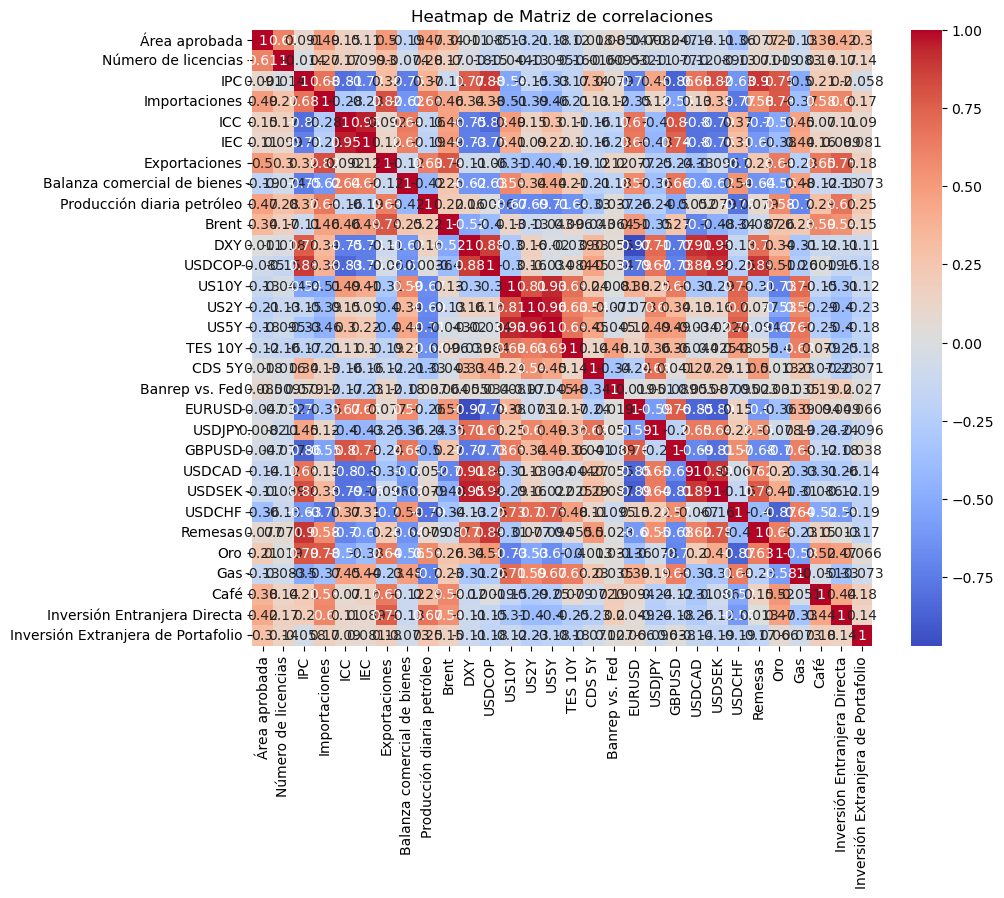

In [8]:
# Importamos matplotlib y seaborn para visualizar datos
import seaborn as sns
import matplotlib.pyplot as plt



# Creamos un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm')
plt.title('Heatmap de Matriz de correlaciones')
plt.show()

Tal como lo dicta la literatura económica, existen unos niveles de correlación altos entre las variables de la muestra, puesto que cada una de las variables suele servir para explicar la evolución de la actividad económica en un país como Colombia. Por ejemplo, el IPC tiene una correlación superior al 0,7 en valor absoluto con el ICC y el IEC. La correlación es negativa y ello se debe a que los tres indicadores están mostrando una tendencia en el consumidor colombiano: Una menor confianza y expectativas del consumidor afecta directamente la inflación de dicha economía ya que ante variaciones en sus expectativas de consumo implicará un cambio en los precios de los bienes contemplados en el IPC.

Sucede algo similar con las importaciones, las cuales tratan de cuantificar el poder adquisitivo de los agentes locales a través de sus cuentas externas. Así las cosas, unos menos niveles de importaciones, deberían implicar una demanda interna debilitada que se ve reflejada en variaciones negativas en el IPC.

A su vez, la correlación positiva entre el área aprobada y el número de licencias da cuenta de la dinámica del sector constructor. Un mayor número de licencias en un mes determinado tiene a incrementar el área aprobada para construir edificaciones. 

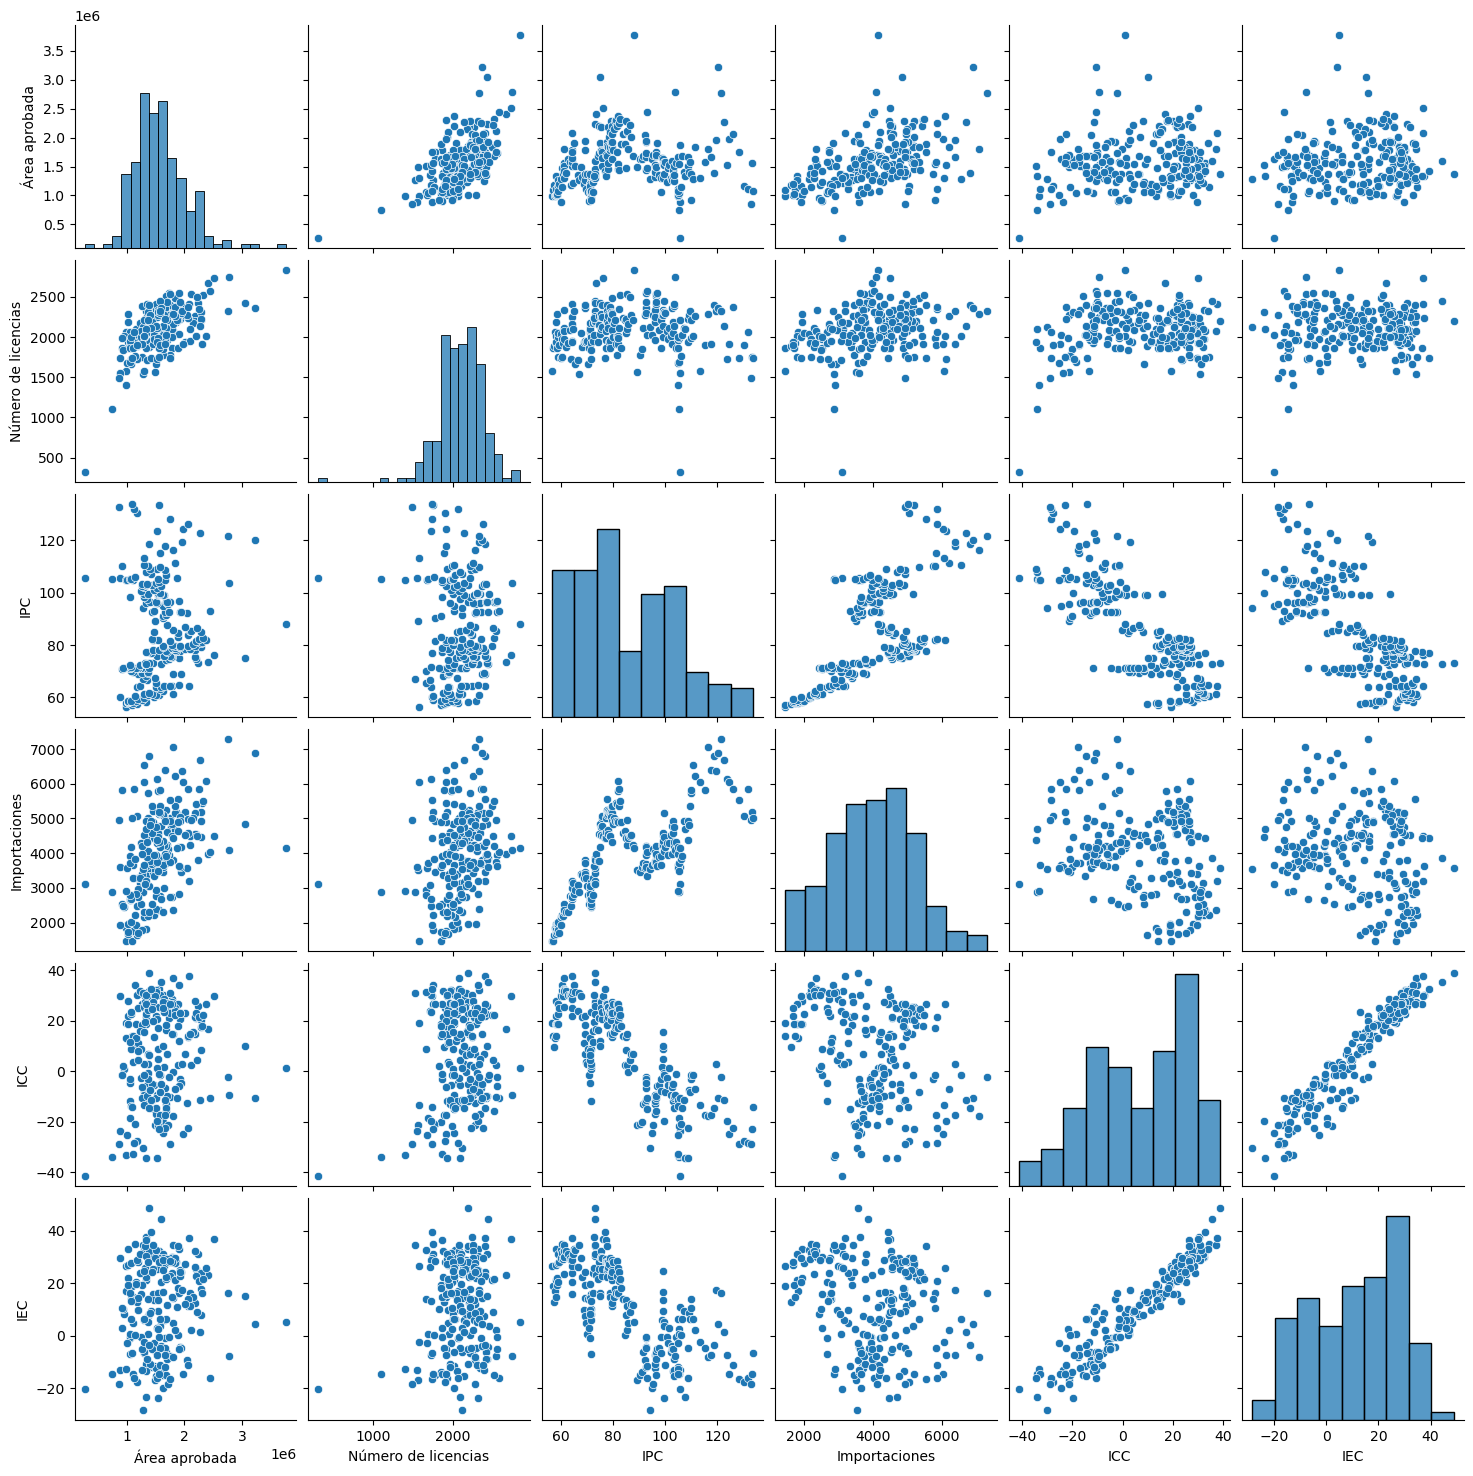

In [9]:
variables = ['Área aprobada','Número de licencias','IPC','Importaciones','ICC','IEC']

# Create scatter plots
g= sns.pairplot(X[variables])
plt.show()

Se observa la existencia de 15 gráficos de dispersion tal cual como lo calculamos al inicio y 6 histogramas con las distribución de cada una de las variables. Además, se observa la correlación positiva entre ICC e IEC por ser variables que tratan de explicar patrones en los hábitos de consumo del colombiano. También se observa un patrón similar entre Área aprobada y Número de licencias e Importaciones con IPC. Así mismo, observamos que la mayoría de las variables sigue una distribución similar a la normal con leves sesgos a la derecha y a la izquierda. Cabe resaltar que no hay missing values.

## Cálculo y selección de componentes principales

Utilizando Álgebra Lineal, calcularemos los eigen valores y los eigen vectores. A partir de ellos, se obtendrán los Componentes Principales.

Luego, se examinarán los valores propios para determinar cuántos componentes principales se deben considerar. Explicaremos el criterio utilizado para la elección.

## Escalar las variables

Al contar con variables con diferentes unidades y medidas, usaremos datos  estandarizados, es decir, centrados para tener media cero y escalados para tener varianza uno.  Desde un punto estrictamente matemático no hay nada intrínsecamente incorrecto en hacer combinaciones lineales de variables con diferentes unidades de medida. Sin embargo, cuando se usa PCA se busca maximizar varianza y la varianza se ve afectada por las unidades de medida. Esto implica que los componentes principales basados en la matriz de covarianza $S$ van a cambiar si las unidades de medida de una o más variables cambian. Para que esto no suceda, es práctica habitual  estandarizar las variables. Es decir, cada valor de $X$ es centrados y dividido por la desviación estándar:

\begin{align}
z_{ij} = \frac{x_{ij}-\bar{x_j}}{s_j}
\end{align}

donde $\bar{x_j}$ es la media y ${s_j}$ es el desvío estándar de la columna $j$. Entonces, la matriz de datos iniciales $X$ es remplazada por la matriz de datos estandarizados $Z$.

In [10]:
# Estandarizamos los datos
mu = X.mean()
sigma = X.std()
Z = (X - mu)/sigma
Z.head()

,Área aprobada,Número de licencias,IPC,Importaciones,ICC,IEC,Exportaciones,Balanza comercial de bienes,Producción diaria petróleo,Brent,...,GBPUSD,USDCAD,USDSEK,USDCHF,Remesas,Oro,Gas,Café,Inversión Entranjera Directa,Inversión Extranjera de Portafolio
Fecha,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-1.316014,-1.837141,-1.540070,-2.094509,0.657060,0.913009,-1.954092,1.287026,-1.700290,-1.248628,...,1.487460,0.436592,-0.751101,1.531325,-1.427018,-2.032515,0.727980,-1.006993,-1.724155,-0.336497
2005-02-01,-1.083201,-0.836663,-1.509914,-2.094139,0.378561,0.455030,-1.809660,1.466997,-1.730171,-1.079576,...,1.651068,0.382110,-0.867558,1.291488,-1.353954,-2.032335,0.724656,-0.716260,-1.577949,-0.304267
2005-03-01,-0.895144,-0.709393,-1.486636,-1.957604,0.153680,0.098540,-1.624354,1.668591,-1.611122,-0.906850,...,1.513739,0.200502,-0.689038,1.594304,-1.134537,-2.007266,1.088058,-0.398491,-1.689638,-0.346038
2005-04-01,-1.330851,-0.115469,-1.472880,-1.786715,0.348369,0.339156,-1.662441,1.625759,-1.628083,-1.037518,...,1.590881,0.577338,-0.636660,1.583952,-1.192688,-2.018915,1.132607,-0.560357,-0.364437,-0.353485
2005-05-01,-1.043760,-0.617476,-1.460712,-1.856443,0.385328,0.211458,-1.609826,1.688256,-1.622513,-1.052218,...,1.208562,0.540260,-0.387039,2.036882,-1.140331,-2.037130,0.848679,-0.587798,-1.681828,-0.331755


Notemos también que al estandarizar la matriz de datos, la matriz de covarianza $S$ es simplemente la matriz de correlación de los datos original. Esto a veces en la literatura se lo conoce como la matriz de correlación de PCA.

Esto contrasta con otras técnicas de aprendizaje supervisado como la regresión lineal, donde escalar las variables no tiene ningún efecto. Si multiplicamos una variable por $\frac{1}{\alpha}$, los coeficientes estarán multiplicados por $\alpha$, no teniendo un efecto en el modelo obtenido.

In [11]:
S = Z.cov()
S

,Área aprobada,Número de licencias,IPC,Importaciones,ICC,IEC,Exportaciones,Balanza comercial de bienes,Producción diaria petróleo,Brent,...,GBPUSD,USDCAD,USDSEK,USDCHF,Remesas,Oro,Gas,Café,Inversión Entranjera Directa,Inversión Extranjera de Portafolio
Área aprobada,1.000000,0.612646,0.091359,0.492003,0.147889,0.107887,0.500614,-0.186311,0.468065,0.341355,...,-0.047216,-0.144401,-0.105291,-0.361947,0.077369,0.208706,-0.131736,0.376373,0.420346,0.298724
Número de licencias,0.612646,1.000000,-0.014442,0.272637,0.168335,0.099116,0.300141,-0.073729,0.280639,0.172498,...,-0.077482,-0.115867,-0.089228,-0.129593,0.070908,0.019296,-0.082623,0.140093,0.165488,0.143044
IPC,0.091359,-0.014442,1.000000,0.680916,-0.808962,-0.728266,0.321849,-0.745006,0.374930,-0.109876,...,-0.862071,0.679963,0.821389,-0.626499,0.895780,0.791288,-0.496705,0.209662,0.198163,-0.057627
Importaciones,0.492003,0.272637,0.680916,1.000000,-0.278779,-0.232381,0.815354,-0.619428,0.656670,0.455234,...,-0.549776,0.128491,0.331870,-0.768881,0.583367,0.783542,-0.368935,0.580099,0.599784,0.170998
ICC,0.147889,0.168335,-0.808962,-0.278779,1.000000,0.951227,0.091974,0.644196,-0.155268,0.463503,...,0.796486,-0.798837,-0.794123,0.373851,-0.704066,-0.520532,0.453942,0.070304,0.113362,0.090444
IEC,0.107887,0.099116,-0.728266,-0.232381,0.951227,1.000000,0.120935,0.615873,-0.192797,0.487752,...,0.740928,-0.796981,-0.755493,0.306653,-0.610744,-0.384626,0.440986,0.157077,0.088775,0.081351
Exportaciones,0.500614,0.300141,0.321849,0.815354,0.091974,0.120935,1.000000,-0.122031,0.628665,0.786255,...,-0.243581,-0.330826,-0.096310,-0.698585,0.228462,0.641729,-0.234731,0.648027,0.754088,0.175873
Balanza comercial de bienes,-0.186311,-0.073729,-0.745006,-0.619428,0.644196,0.615873,-0.122031,1.000000,-0.422293,0.249657,...,0.662233,-0.595441,-0.621007,0.537098,-0.637239,-0.562356,0.479418,-0.123639,-0.126698,-0.073249
Producción diaria petróleo,0.468065,0.280639,0.374930,0.656670,-0.155268,-0.192797,0.628665,-0.422293,1.000000,0.219571,...,-0.502443,0.052029,0.079299,-0.788061,0.078904,0.582573,-0.701604,0.289467,0.670446,0.245554
Brent,0.341355,0.172498,-0.109876,0.455234,0.463503,0.487752,0.786255,0.249657,0.219571,1.000000,...,0.265847,-0.702599,-0.483226,-0.342898,-0.086811,0.261606,0.228656,0.587418,0.541329,0.146334


Notemos que la matriz S es una matriz cuadrada:

In [6]:
S.shape

(30, 30)

## Descomposición espectral o eigendecomposición

El procedimiento para obtener los componentes principales de la matriz Z pasa por la descomposición espectral o eigendescomposición, donde los valores de los eigenvalues nos determinarán los eigenvectores o loadings a utilizar para cada componente principal.

Así las cosas, la descomposición espectral o eigendecomposición es una forma de descomponer matrices. Descomponer una matriz significa encontrar un producto de matrices que sea igual a la matriz inicial. En el caso de la eigendecomposición, descomponemos la matriz inicial en el producto de sus eigenvectores y eigenvalores.

Veamos cómo se usan los eigenvectores y eigenvalores para descomponer una matriz. Tomando los eigenvectores de una matriz $A_{m\times m}$ podemos concatenarlos y colocarlos en una matriz $P$. Entonces $P$ será una matriz cuyas columnas son los eigenvectores de $A$:

\begin{align}
A= P\Lambda P'
\end{align}

donde $\Lambda =diag(\lambda)$ es una matriz diagonal de los eigenvalores.

Es importante notar que esta descomposición sólo es válida para matrices cuadradas, como lo es la matriz de covarianza. Por lo tanto, no puede ser utilizada para matrices no cuadradas.

Obtenemos los eigenvalues y los  eigenvectores de S:

In [12]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([1.10206812e+01, 7.42295870e+00, 3.29008961e+00, 1.73367173e+00,
       1.50158209e+00, 9.79396262e-01, 8.39050286e-01, 6.52566560e-01,
       5.31205715e-01, 4.04183084e-01, 3.13405302e-01, 2.55861902e-01,
       2.36957169e-01, 1.86207170e-01, 1.32120409e-01, 1.15132615e-01,
       8.10058791e-02, 7.33457089e-02, 6.06084809e-02, 4.01786694e-02,
       3.22661737e-02, 2.48999755e-02, 1.17928436e-03, 3.08612766e-03,
       4.86305862e-03, 6.52320878e-03, 9.72609538e-03, 1.40950710e-02,
       1.55723816e-02, 1.75800851e-02])

In [13]:
eig_val_diag = np.diag(eig_val)
eig_val_diag

array([[1.10206812e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.42295870e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00,

y reconstrumios $S$:

In [14]:
eig_vec.dot(eig_val_diag).dot(eig_vec.T)

array([[ 1.        ,  0.6126461 ,  0.09135903,  0.49200293,  0.14788925,
         0.10788686,  0.50061431, -0.18631066,  0.46806545,  0.34135509,
         0.01099371, -0.08470826, -0.13489273, -0.20513559, -0.18413043,
        -0.12182303,  0.01763639,  0.08519596, -0.04664664,  0.00823232,
        -0.04721631, -0.14440067, -0.10529103, -0.36194749,  0.07736923,
         0.20870636, -0.13173613,  0.37637305,  0.42034581,  0.29872426],
       [ 0.6126461 ,  1.        , -0.01444157,  0.2726373 ,  0.16833503,
         0.09911635,  0.30014088, -0.073729  ,  0.28063859,  0.17249833,
        -0.01775482, -0.14738109, -0.043608  , -0.13049957, -0.09495967,
        -0.1577432 , -0.01639415, -0.00948297, -0.03164206, -0.10767075,
        -0.07748155, -0.1158673 , -0.08922781, -0.12959347,  0.0709083 ,
         0.01929605, -0.08262257,  0.14009271,  0.16548819,  0.14304413],
       [ 0.09135903, -0.01444157,  1.        ,  0.68091628, -0.80896241,
        -0.72826635,  0.32184932, -0.74500606,  0

Recobrando de esta forma la matriz $S$ original.

## Cálculo de componentes principales y método de selección de número óptimo  de ellos

Vamos a utilizar el criterio de Kaiser y el método gráfico generado a partir de la varianza explicada acumulada por cada componente principal adicional para evaluar el número máximo de componentes principales.

### 1) Método de Kaiser:

El primer método, el de Kaiser, sugiere que solo se retengan los componentes principales cuyos eigenvalores sean mayores a 1. La idea es que se retengan aquellos componentes cuyos eigenvalues sean superiores a la media de los eigenvalues:

\begin{align}
\lambda_h> \frac{\sum_j^k \lambda_j}{k}
\end{align}

Dado que los datos están estandarizados tenemos que $\sum_j^k \lambda_j=k$, por lo que es equivalente a buscar los eigenvalues mayores a uno, que en nuestro caso son dos los eigenvalores que superan este umbral: los ubicados en el índice 0 y 1 de nuestra matriz de eigenvalores.

In [15]:
eig_val, eig_vec = np.linalg.eig(S)
eig_val

array([1.10206812e+01, 7.42295870e+00, 3.29008961e+00, 1.73367173e+00,
       1.50158209e+00, 9.79396262e-01, 8.39050286e-01, 6.52566560e-01,
       5.31205715e-01, 4.04183084e-01, 3.13405302e-01, 2.55861902e-01,
       2.36957169e-01, 1.86207170e-01, 1.32120409e-01, 1.15132615e-01,
       8.10058791e-02, 7.33457089e-02, 6.06084809e-02, 4.01786694e-02,
       3.22661737e-02, 2.48999755e-02, 1.17928436e-03, 3.08612766e-03,
       4.86305862e-03, 6.52320878e-03, 9.72609538e-03, 1.40950710e-02,
       1.55723816e-02, 1.75800851e-02])

In [16]:
df_eig_val = pd.DataFrame(eig_val)
df_eig_val

,0
0,11.020681
1,7.422959
2,3.290090
3,1.733672
4,1.501582
5,0.979396
6,0.839050
7,0.652567
8,0.531206
9,0.404183


En este caso, 4 eigenvalues superan el umbral de 1. Tomaremos adicionalmente el quinto componente dado que este es aproximadamente 1 (0.98).

### 2) Método gráfico a partir de varianza explicada acumulada:

Para el segundo método, usaremos la librería pca de python para estimar un modelo con 30 componentes principales. Luego, de manera gráfica estableceremos un umbral de 80% de varianza explicada para determinar el número de componentes principales a utilizar en el modelo.

In [19]:
from pca import pca
model = pca(n_components=30)

In [20]:
results = model.fit_transform(Z, verbose=False)
results

{'loadings':       Área aprobada  Número de licencias       IPC  Importaciones       ICC  \
 PC1       -0.047431            -0.015928 -0.284753      -0.204063  0.250404   
 PC2        0.164955             0.107910 -0.036959       0.172396  0.122356   
 PC3        0.227851             0.123248  0.119312       0.271700  0.090453   
 PC4       -0.337962            -0.407372  0.052573      -0.037205 -0.173098   
 PC5        0.357386             0.356156 -0.121265      -0.016107  0.002209   
 PC6       -0.015775             0.200923 -0.009370      -0.011836  0.114634   
 PC7       -0.149302            -0.540745 -0.006825       0.036809  0.104454   
 PC8        0.091596            -0.079674  0.018244       0.035340 -0.033185   
 PC9        0.116573            -0.259863 -0.117970       0.155156  0.305223   
 PC10       0.349522            -0.152242 -0.003366      -0.219719 -0.104180   
 PC11       0.528688            -0.264864 -0.057762      -0.118353 -0.243706   
 PC12      -0.309692        

In [21]:
# Utilice este espacio para escribir el código.
# Cumulative explained variance
print(model.results['explained_var'])

[0.36735604 0.614788   0.72445765 0.78224671 0.83229944 0.86494599
 0.89291433 0.91466655 0.9323734  0.94584617 0.95629302 0.96482175
 0.97272032 0.97892723 0.98333124 0.98716899 0.98986919 0.99231405
 0.99433433 0.99567362 0.99674916 0.99757916 0.99816516 0.99868424
 0.99915407 0.99947828 0.99969572 0.99985782 0.99996069 1.        ]


In [22]:
print(model.results['variance_ratio'])

[3.67356040e-01 2.47431957e-01 1.09669654e-01 5.77890575e-02
 5.00527362e-02 3.26465421e-02 2.79683429e-02 2.17522187e-02
 1.77068572e-02 1.34727695e-02 1.04468434e-02 8.52873006e-03
 7.89857230e-03 6.20690566e-03 4.40401363e-03 3.83775383e-03
 2.70019597e-03 2.44485696e-03 2.02028270e-03 1.33928898e-03
 1.07553912e-03 8.29999185e-04 5.86002837e-04 5.19079385e-04
 4.69835699e-04 3.24203179e-04 2.17440293e-04 1.62101954e-04
 1.02870922e-04 3.93094788e-05]


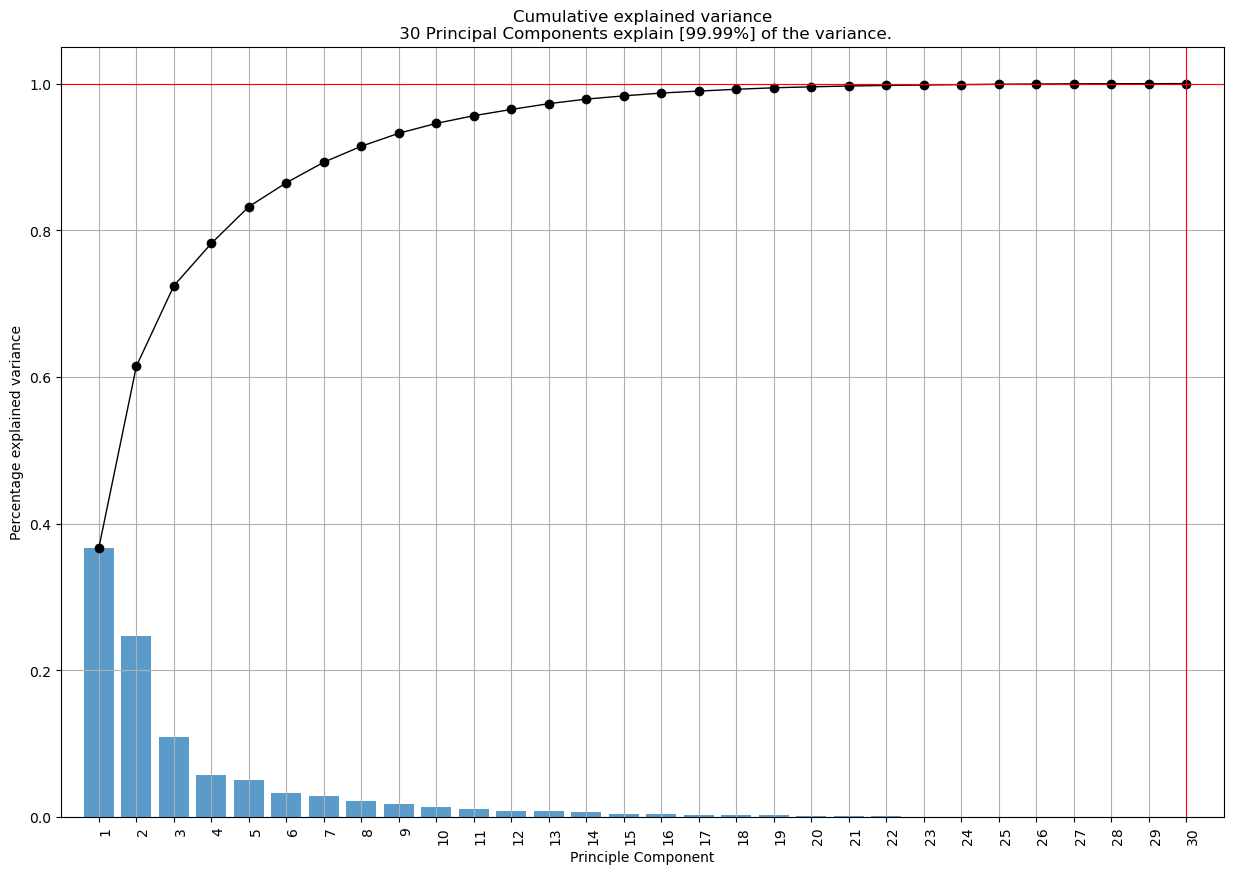

In [23]:
# Make plot
fig, ax = model.plot()

Podemos evidenciar que ambos métodos llegan a la misma conclusión: 1) por una parte, el criterio de Kaiser sugiere tomar cinco componentes principales, y 2) en el método gráfico se evidencia que se logra una varianza explicada acumulada superior al 80% a partir del quinto componente principal. Por lo que tomaremos los cinco componentes principales para la elaboración de nuestro indicador.

## Cálculo de componentes principales

Ahora bien, el primer componente principal estará compuesto por el eigenvector correspondiente al eigenvalor más alto. Así las cosas, seleccionaremos para el primer componente principal el eigenvector del eigenvalor = 11.020681.

In [24]:
df_eig_val

,0
0,11.020681
1,7.422959
2,3.290090
3,1.733672
4,1.501582
5,0.979396
6,0.839050
7,0.652567
8,0.531206
9,0.404183


In [25]:
eig_vec=eig_vec.T
eig_vec[[0]]

array([[-0.04743114, -0.01592789, -0.28475303, -0.20406323,  0.25040377,
         0.23311204, -0.08632062,  0.24504914, -0.16287759,  0.07089997,
        -0.23885246, -0.24359841,  0.21452041,  0.10566136,  0.15724594,
         0.10403881, -0.0455743 , -0.02772806,  0.23420515, -0.10292752,
         0.27881461, -0.2179815 , -0.24212205,  0.20172683, -0.2355528 ,
        -0.2355573 ,  0.19567861, -0.05074817, -0.06959637, -0.00167103]])

Por lo tanto, el primer componente principal es:

\begin{align}
f_1 =  -0.047 \times Área + -0.015 \times Licencias + -0.284 \times IPC + 0.250 \times Importaciones + 0.233 \times ICC +...+ -0.050 \times Café
\end{align}

Calculando este componente para cada una de las observaciones tenemos entonces un índice que reduce las seis variables en una:

In [26]:
f1=Z.dot(eig_vec[[0]].T) #calculamos f1
f1.columns = ['CP1'] #nombramos la columna del primer componente como CP1
f1.head()

,CP1
Fecha,
2005-01-01,5.070259
2005-02-01,5.022338
2005-03-01,4.886008
2005-04-01,4.735571
2005-05-01,4.400400


Podemos observar que este componente está recogiendo los valores macroeconómicos provenientes de la demanda, puesto que los mayores loadings se han asignado a las variables: IPC, importaciones, ICC e IEC. Estas recogen la fortaleza relativa de la demanda interna con el fin de identificar puntos de inflexión en la actividad económica. 

Continuando con el ejemplo anterior, el segundo componente principal es aquel que está asociado al segundo eigenvalue mayor, que es 1.96797888. 

In [27]:
eig_vec=eig_vec.T
eig_vec[[1]]

array([[-1.59278904e-02, -1.07910012e-01,  1.23248372e-01,
        -4.07372155e-01, -3.56155585e-01, -2.00922783e-01,
         5.40745086e-01,  7.96736445e-02,  2.59862884e-01,
        -1.52241707e-01,  2.64864267e-01,  1.37204297e-01,
        -2.26629028e-01,  2.24415613e-03,  2.07029792e-01,
         5.03045532e-02,  3.47250422e-02, -1.65177156e-01,
         5.60191424e-02,  1.38936652e-01,  7.17112046e-02,
        -8.31832139e-02, -7.04474452e-03, -1.18150183e-04,
        -1.33744398e-02,  1.28611818e-02,  1.35202833e-02,
         2.29877460e-02, -1.79257211e-02, -1.13272851e-02]])

Por lo tanto, el segundo componente principal es:

\begin{align}
f_1 =  0.164 \times Área + 0.107 \times Licencias + -0.036 \times IPC + 0.172 \times Importaciones + 0.122 \times ICC +...+ 0.198 \times Café
\end{align}

Calculando este componente para cada una de las observaciones tenemos entonces un índice que reduce las seis variables en una:

In [28]:
f2=Z.dot(eig_vec[[1]].T) #calculamos f1
f2.columns = ['CP2'] #nombramos la columna del primer componente como CP1
f2.head()

,CP2
Fecha,
2005-01-01,-0.810114
2005-02-01,-0.689517
2005-03-01,-0.338782
2005-04-01,-0.637227
2005-05-01,-0.373216


Así mismo, observamos que el segundo componente está recogiendo los efectos macroeconómicos provenientes de la oferta, puesto que las variables Área aprobada y Número de licencias tienen los mayores loadings y están correlacionados con qué tan fuerte será el sector construcción al momento de ofrecer proyectos de vivienda. Así mismo, la variable importaciones tiene un peso importante ya que muchos de los materiales del sector edificador son importados y continúa reflejando los estímulos que tiene la oferta sobre la actividad económica.

Así, para concluir el análisis de los componentes, podemos evidenciar que el primer componente principal recoge los choques de demanda y el segundo los de oferta a la hora de construir nuestro índice adelantado de actividad económica colombiana.

Realizamos el mismo ejercicio con los tres componentes principales restantes y los almacenamos en un dataframe.

In [29]:
f3=Z.dot(eig_vec[[2]].T) #calculamos f1
f3.columns = ['CP3'] #nombramos la columna del primer componente como CP1
f3.head()

,CP3
Fecha,
2005-01-01,-0.717615
2005-02-01,-0.672513
2005-03-01,-0.423823
2005-04-01,-0.194474
2005-05-01,-0.288818


In [30]:
f4=Z.dot(eig_vec[[3]].T) #calculamos f1
f4.columns = ['CP4'] #nombramos la columna del primer componente como CP1
f4.head()

,CP4
Fecha,
2005-01-01,3.951251
2005-02-01,3.559155
2005-03-01,3.263119
2005-04-01,2.808987
2005-05-01,3.093637


In [31]:
f5=Z.dot(eig_vec[[4]].T) #calculamos f1
f5.columns = ['CP5'] #nombramos la columna del primer componente como CP1
f5.head()

,CP5
Fecha,
2005-01-01,-0.402274
2005-02-01,-0.486679
2005-03-01,-0.546624
2005-04-01,-1.180832
2005-05-01,-0.363828


In [105]:
df_5_cp = pd.concat([f1, f2, f3, f4, f5], axis=1)
df_5_cp

,CP1,CP2,CP3,CP4,CP5
Fecha,,,,,
2005-01-01,5.070259,-0.810114,-0.717615,3.951251,-0.402274
2005-02-01,5.022338,-0.689517,-0.672513,3.559155,-0.486679
2005-03-01,4.886008,-0.338782,-0.423823,3.263119,-0.546624
2005-04-01,4.735571,-0.637227,-0.194474,2.808987,-1.180832
2005-05-01,4.400400,-0.373216,-0.288818,3.093637,-0.363828
...,...,...,...,...,...
2023-02-01,-5.048102,2.002568,0.884315,0.474157,1.523883
2023-03-01,-5.335575,1.772386,0.998892,0.376932,1.276779
2023-04-01,-5.249570,1.915039,0.707900,-0.371235,0.828416


In [106]:
contribucion_varianza_x_componente = np.array([[model.results['variance_ratio'][0]]*222,[model.results['variance_ratio'][1]]*222,[model.results['variance_ratio'][2]]*222,[model.results['variance_ratio'][3]]*222,[model.results['variance_ratio'][4]]*222])
contribucion_varianza_x_componente = contribucion_varianza_x_componente.T
contribucion_varianza_x_componente = pd.DataFrame(contribucion_varianza_x_componente, columns=['WPC1','WPC2','WPC3','WPC4','WPC5'])
contribucion_varianza_x_componente

,WPC1,WPC2,WPC3,WPC4,WPC5
0,0.367356,0.247432,0.10967,0.057789,0.050053
1,0.367356,0.247432,0.10967,0.057789,0.050053
2,0.367356,0.247432,0.10967,0.057789,0.050053
3,0.367356,0.247432,0.10967,0.057789,0.050053
4,0.367356,0.247432,0.10967,0.057789,0.050053
...,...,...,...,...,...
217,0.367356,0.247432,0.10967,0.057789,0.050053
218,0.367356,0.247432,0.10967,0.057789,0.050053
219,0.367356,0.247432,0.10967,0.057789,0.050053
220,0.367356,0.247432,0.10967,0.057789,0.050053


In [107]:
# Realizar la suma producto
CLI = pd.DataFrame(np.sum(df_5_cp.values * contribucion_varianza_x_componente.values, axis=1), columns=['CLI'])
CLI.index = df_5_cp.index
# Mostrar el DataFrame resultante
CLI

,CLI
Fecha,
2005-01-01,1.791646
2005-02-01,1.781944
2005-03-01,1.825811
2005-04-01,1.663867
2005-05-01,1.653061
...,...
2023-02-01,-1.158294
2023-03-01,-1.326274
2023-04-01,-1.356973


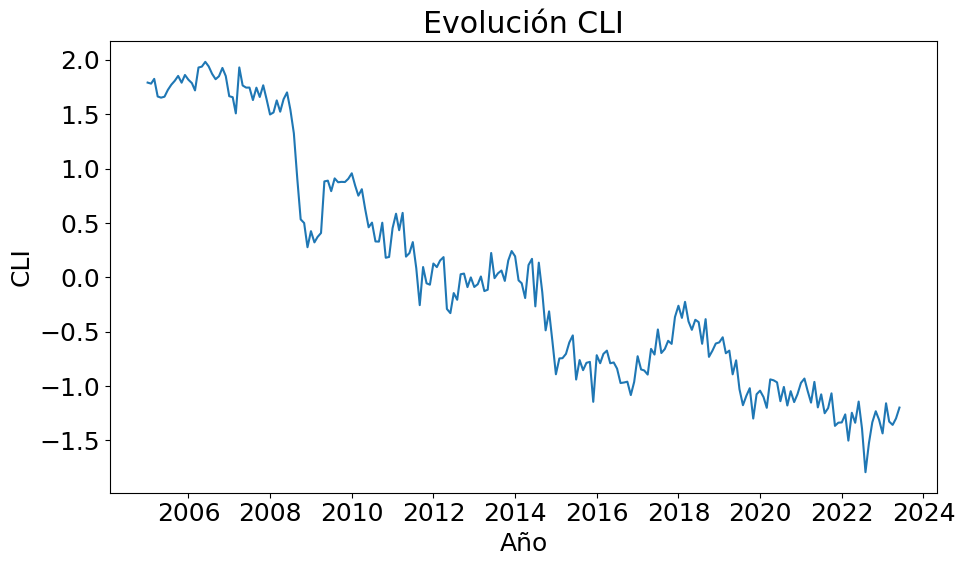

In [112]:
# Asegurarse de que el índice es de tipo datetime
CLI.index = pd.to_datetime(CLI.index)

# Crear la gráfica de línea
plt.figure(figsize=(10,6))
plt.plot(CLI)
plt.xlabel('Año')
plt.ylabel('CLI')
plt.title('Evolución CLI')
plt.tight_layout()
plt.show()

## Cálculo de componentes principales con `PyPI`


Ahora, vamos a realizar el cálculo de los componentes pricipales utilizando la biblioteca [pca](https://pypi.org/project/pca/) disponible en `PyPI`. Esta biblioteca es una herramienta de análisis de componentes principales que proporciona una interfaz fácil de usar y expande las capacidades que tiene la clase  [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)  de la librería [scikit-learn](https://scikit-learn.org/stable/) 



Entonces iniciemos importando la librería:

In [36]:
#pip install pca

In [30]:
# Carguemos la librería
from pca import pca

Con la biblioteca `pca` importada, el siguiente paso es inicializar un objeto PCA. La biblioteca `pca` proporciona una clase `pca` que podemos utilizar para este propósito. Una vez que tengamos nuestro objeto PCA, podemos ajustarlo a nuestros datos.

A diferencia de la biblioteca `sklearn`, la biblioteca `pca` combina los pasos de ajuste y transformación en una sola función, lo que simplifica el proceso. Además, esta biblioteca proporciona visualizaciones integradas que nos permiten ver fácilmente los resultados del PCA.

Vamos a inicializar nuestro objeto PCA y ajustarlo a nuestros datos.

In [37]:
# Inicializamos el objeto PCA
model = pca(n_components=5)

In [38]:
# Ajustamos el PCA a nuestros datos 
CLI_pca = model.fit_transform(Z, verbose=False)
CLI_pca

{'loadings':      Área aprobada  Número de licencias       IPC  Importaciones       ICC  \
 PC1      -0.047431            -0.015928 -0.284753      -0.204063  0.250404   
 PC2       0.164955             0.107910 -0.036959       0.172396  0.122356   
 PC3       0.227851             0.123248  0.119312       0.271700  0.090453   
 PC4      -0.337962            -0.407372  0.052573      -0.037205 -0.173098   
 PC5       0.357386             0.356156 -0.121265      -0.016107  0.002209   
 
           IEC  Exportaciones  Balanza comercial de bienes  \
 PC1  0.233112      -0.086321                     0.245049   
 PC2  0.131056       0.272556                     0.006998   
 PC3  0.095030       0.283720                    -0.011230   
 PC4 -0.126979       0.030962                     0.013673   
 PC5 -0.110757      -0.053655                    -0.097872   
 
      Producción diaria petróleo     Brent  ...    GBPUSD    USDCAD    USDSEK  \
 PC1                   -0.162878  0.070900  ...  0.278815

La función nos retorna entonces los *loadings* y los componentes principales. Notemos que son iguales a los encontrados anteriormente.

La biblioteca `pca` proporciona varias funcionalidades extras. Entre ellas la función `biplot` que nos permite visualizar fácilmente los componentes principales y las cargas originales en un solo gráfico. 

Vamos a crear un biplot de nuestros resultados de PCA.

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


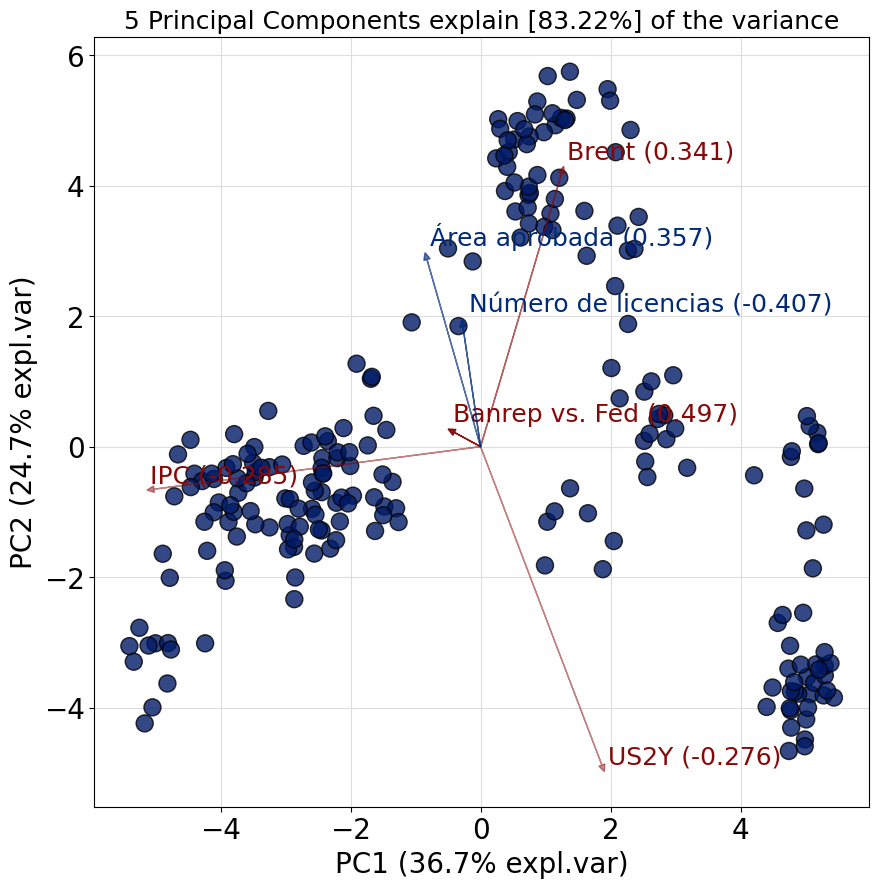

In [39]:
import matplotlib 

# Creamos el biplot
fig, ax = model.biplot(n_feat=6, legend=False, figsize=(10,10))

El biplot anterior muestra los dos primeros componentes principales (PC1 y PC2) en el eje x e y, respectivamente. Las flechas representan los *loadings*  de las variables en estos componentes. La dirección y longitud de las flechas indican cómo cada variable contribuye a los componentes principales.

En este biplot, podemos observar cómo las diferentes variables (representadas por flechas) están relacionadas entre sí y cómo están distribuidas en relación con los dos primeros componentes principales. Las observaciones (puntos) representan las proyecciones de los datos originales en el espacio de los componentes principales.

El biplot es una herramienta poderosa para la interpretación de un PCA, ya que combina información sobre las observaciones y las variables en un solo gráfico. Nos permite entender la estructura subyacente de los datos y cómo las variables contribuyen a la variabilidad capturada por los componentes principales.

Finalmente, cabe mencionar que la interpretación de un biplot puede ser un poco compleja, especialmente cuando se trata de conjuntos de datos de alta dimensionalidad. Sin embargo, sigue siendo una herramienta útil para la exploración inicial de datos y la visualización de la estructura subyacente en los datos.

## Proporción de Varianza Explicada


Una propiedad muy útil del procedimiento del cálculo de componentes principales es que la variabilidad total de $X$ es la suma de los $k$ eigenvalores de $V(X)=S$. 

Esto nos sugiere que la varianza del $j-ésimo$ componente principal es el $j-ésimo$ eigenvalor ordenado de S.

Este resultado nos permite preguntarnos: ¿Cuánta información perdimos por proyectar los datos en unos cuantos componentes principales? Esto es, ¿Cuánto de la varianza esta contenida en los primeros componentes principales?

Continuando con el ejemplo, podemos calcular la proporción de varianza contenida en cada componente principal:

In [40]:
eig_val/sum(eig_val)

array([3.67356040e-01, 2.47431957e-01, 1.09669654e-01, 5.77890575e-02,
       5.00527362e-02, 3.26465421e-02, 2.79683429e-02, 2.17522187e-02,
       1.77068572e-02, 1.34727695e-02, 1.04468434e-02, 8.52873006e-03,
       7.89857230e-03, 6.20690566e-03, 4.40401363e-03, 3.83775383e-03,
       2.70019597e-03, 2.44485696e-03, 2.02028270e-03, 1.33928898e-03,
       1.07553912e-03, 8.29999185e-04, 3.93094788e-05, 1.02870922e-04,
       1.62101954e-04, 2.17440293e-04, 3.24203179e-04, 4.69835699e-04,
       5.19079385e-04, 5.86002837e-04])

Podemos ver entonces que en este ejemplo:

- El primer componente principal explica el 36,7% del total de la varianza.

- El segundo componente principal explica el 24,7% del total de la varianza.

- El tercer componente principal explica el 10,9% del total de la varianza.

- Entre el cuarto y quinto componente se explica 10,7% del total de la varianza.

- Entre los otros 25 componentes se explica el 16,7% de la varianza restante. 

# Descomposición en Valores Singulares

A continuación, vamos a realizar una aproximación por SVD (Descomposición en Valores Singulares por sus siglas en inglés), especialmente la SVD Truncada para encontrar una matriz que logre contener la información necesaria para construir el indice buscado y al mismo tiempo reducir la dimensión de la matriz original de 222 x 30.

Sabemos que SVD es una factorización matricial en un producto de tres matrices que nos permite encontrar información relevante de una matriz de información de la siguiente manera:

\begin{align}
\underset{n\times k}{\underbrace{X}}=\underset{n\times n}{\underbrace{U}}\underset{n\times k}{\underbrace{S}}\underset{k\times k}{\underbrace{V'}}
\end{align}

donde:

1. $U$ es una matriz $n\times n$ cuyas columnas son ortogonales $(U'U=I_{n})$, y donde las columnas de $U$ son los vectores singulares de la izquierda
2. $V$ es una matriz $k\times k$ cuyas filas y columnas son  ortogonales $(V'V=VV'=I_{k})$, y las columnas de V son los vectores singulares de la derecha.
3. $S$ es una matriz $n\times k$ que contiene los $r=min(n,k)$ valores singulares $(\sigma_{i}\geq0)$ en la diagonal principal, y 0 en el resto de la matriz.

{Dar un poco mas de explicacion de lo buscado}

Además, el SVD cuenta con la ventaja de que no se necesita una matriz cuadrada como sucede con PCA por ejemplo. A continuación relacionamos el procedimiento:

In [154]:
# Cargamos la función SVD
from scipy.linalg import svd 
from sklearn.decomposition import TruncatedSVD

In [113]:
# Presentamos la matriz sobre la cual vamos a realizar el estudio
Z

,Área aprobada,Número de licencias,IPC,Importaciones,ICC,IEC,Exportaciones,Balanza comercial de bienes,Producción diaria petróleo,Brent,...,GBPUSD,USDCAD,USDSEK,USDCHF,Remesas,Oro,Gas,Café,Inversión Entranjera Directa,Inversión Extranjera de Portafolio
Fecha,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-1.316014,-1.837141,-1.540070,-2.094509,0.657060,0.913009,-1.954092,1.287026,-1.700290,-1.248628,...,1.487460,0.436592,-0.751101,1.531325,-1.427018,-2.032515,0.727980,-1.006993,-1.724155,-0.336497
2005-02-01,-1.083201,-0.836663,-1.509914,-2.094139,0.378561,0.455030,-1.809660,1.466997,-1.730171,-1.079576,...,1.651068,0.382110,-0.867558,1.291488,-1.353954,-2.032335,0.724656,-0.716260,-1.577949,-0.304267
2005-03-01,-0.895144,-0.709393,-1.486636,-1.957604,0.153680,0.098540,-1.624354,1.668591,-1.611122,-0.906850,...,1.513739,0.200502,-0.689038,1.594304,-1.134537,-2.007266,1.088058,-0.398491,-1.689638,-0.346038
2005-04-01,-1.330851,-0.115469,-1.472880,-1.786715,0.348369,0.339156,-1.662441,1.625759,-1.628083,-1.037518,...,1.590881,0.577338,-0.636660,1.583952,-1.192688,-2.018915,1.132607,-0.560357,-0.364437,-0.353485
2005-05-01,-1.043760,-0.617476,-1.460712,-1.856443,0.385328,0.211458,-1.609826,1.688256,-1.622513,-1.052218,...,1.208562,0.540260,-0.387039,2.036882,-1.140331,-2.037130,0.848679,-0.587798,-1.681828,-0.331755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-01,-0.911314,-0.691717,2.372281,0.849761,-1.793209,-1.706180,0.759591,-0.356373,-0.210188,0.301825,...,-1.400275,1.376413,2.052763,-0.597017,2.379144,1.421892,-0.869116,0.873096,0.241881,-1.900914
2023-03-01,-1.026002,-0.122540,2.444761,1.504014,-1.829648,-1.611589,1.009678,-1.006245,-0.120496,0.133590,...,-1.267608,1.278042,1.982711,-0.832541,2.539057,1.567869,-0.878260,0.796533,0.121044,-1.674563
2023-04-01,-1.607402,-2.119962,2.499254,0.755094,-1.845265,-1.741652,0.313600,-0.782623,-0.050901,0.124199,...,-1.166306,1.304527,1.881345,-1.011125,1.778889,1.782191,-0.971466,1.055838,2.867353,-0.701170


In [155]:
# Descomponemos la matriz Z en el producto de las tres matrices:
U,S,Vt = svd(Z)

# Identificamos las matrices resultantes y sus dimensiones:
print("\nDimension de U:", U.shape)
print('\nVectores singulares izquierdos U=', U)
print("\nDimension de S:", S.shape)
print('\nValores Singulares S=', S)
print("\nDimension de Vt:", Vt.shape)
print('\nVectores singulares derechos Vt=', Vt)


Dimension de U: (222, 222)

Vectores singulares izquierdos U= [[-0.10273768 -0.0936991  -0.06292808 ... -0.11275562 -0.01786856
  -0.0737244 ]
 [-0.10176668 -0.08720787 -0.04677619 ... -0.07388149 -0.12993432
  -0.07956602]
 [-0.09900425 -0.09348418 -0.02687773 ...  0.17607977  0.09783601
   0.15198289]
 ...
 [ 0.10637104 -0.06856527  0.11286191 ...  0.76502098 -0.06423398
  -0.17176421]
 [ 0.10948424 -0.07550723  0.13085179 ... -0.07059973  0.72495401
  -0.21968609]
 [ 0.09653378 -0.07678699  0.13133892 ... -0.16340247 -0.19848821
   0.66142204]]

Dimension de S: (30,)

Valores Singulares S= [49.35149994 40.50276376 26.96497366 19.57399937 18.21674068 14.71212337
 13.6172726  12.00904699 10.83496484  9.45116192  8.32241382  7.51967289
  7.2365416   6.41496567  5.40357385  5.04423511  4.23111088  4.02609012
  3.65984621  2.97984663  2.67036035  2.34582493  1.97109077  1.85512704
  1.76493929  1.46610609  1.20067862  1.03669473  0.82585363  0.51051136]

Dimension de Vt: (30, 30)

Vecto

In [162]:


# Aplicamos la SVD truncada
n_components = 30  # Número de componentes principales a retener
svd_truncated = TruncatedSVD(n_components=n_components)
X_reduced = svd_truncated.fit_transform(Z)

# Calculamos la varianza explicada por cada componente
explained_variance_ratio = svd_truncated.explained_variance_ratio_

# Calculamos la varianza acumulativa explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Imprimimos la varianza explicada por cada componente y la varianza acumulativa explicada
for i, ev in enumerate(explained_variance_ratio):
    print(f'Componente {i + 1}: {ev:.4f} ({cumulative_explained_variance[i]:.4f} acumulativa)')

# Definimos un Umbral del 0.80 similar al procedimiento por EigenValores y EigenVectores 
# de la varianza acumulativa explicada
threshold = 0.80
num_components_to_retain = np.argmax(cumulative_explained_variance >= threshold) + 1

print(f'Número de componentes para retener {threshold * 100}% de la varianza acumulativa explicada: {num_components_to_retain}')

# Puedes usar X_reduced con el número de componentes seleccionados
X_reduced_selected = X_reduced[:, :num_components_to_retain]

Componente 1: 0.3674 (0.3674 acumulativa)
Componente 2: 0.2474 (0.6148 acumulativa)
Componente 3: 0.1097 (0.7245 acumulativa)
Componente 4: 0.0578 (0.7822 acumulativa)
Componente 5: 0.0501 (0.8323 acumulativa)
Componente 6: 0.0326 (0.8649 acumulativa)
Componente 7: 0.0280 (0.8929 acumulativa)
Componente 8: 0.0218 (0.9147 acumulativa)
Componente 9: 0.0177 (0.9324 acumulativa)
Componente 10: 0.0135 (0.9458 acumulativa)
Componente 11: 0.0104 (0.9563 acumulativa)
Componente 12: 0.0085 (0.9648 acumulativa)
Componente 13: 0.0079 (0.9727 acumulativa)
Componente 14: 0.0062 (0.9789 acumulativa)
Componente 15: 0.0044 (0.9833 acumulativa)
Componente 16: 0.0038 (0.9872 acumulativa)
Componente 17: 0.0027 (0.9899 acumulativa)
Componente 18: 0.0024 (0.9923 acumulativa)
Componente 19: 0.0020 (0.9943 acumulativa)
Componente 20: 0.0013 (0.9957 acumulativa)
Componente 21: 0.0011 (0.9967 acumulativa)
Componente 22: 0.0008 (0.9976 acumulativa)
Componente 23: 0.0006 (0.9982 acumulativa)
Componente 24: 0.000

In [163]:
# valores singulares retenidos
l= num_components_to_retain

# Realizamos un ejercicio con los valores singulares retenidos
var_explained = np.round(S**2/np.sum(S**2), decimals=6)
print(f"Varianza Explicada con {l} valores singulares igual a: {sum(var_explained[0:l])*100}%", )

S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal

print("\nDimension de S2 en una matriz diagonal: ", S2.shape) 
print("\nS2=\n",S2)

Varianza Explicada con 5 valores singulares igual a: 83.23%

Dimension de S2 en una matriz diagonal:  (5, 5)

S2=
 [[49.35149994  0.          0.          0.          0.        ]
 [ 0.         40.50276376  0.          0.          0.        ]
 [ 0.          0.         26.96497366  0.          0.        ]
 [ 0.          0.          0.         19.57399937  0.        ]
 [ 0.          0.          0.          0.         18.21674068]]


In [164]:
def svd_truncada(l, X):
    """
     Esta función retorna la aproximación a la matriz original a partir de la SVD truncada

    Parameters:
        l (int):  número de valores singulares a utilizar en la reconstrucción
        X (array): matriz original a descomponer

    Returns:
        resultado (array): reconstrucción de X con l componentes principales
    """
    # SVD 
    U,S,Vt = svd(X)

    
    S2= np.resize(S,[l,1])*np.eye(l,l) #ponemos los valores singulares en una matriz diagonal
    
    # SVD truncada
    return(np.dot(U[:,0:l],np.dot(S2,Vt[0:l,:])))

# Matriz Original reconstruida con los componentes principales que explican >80% de la varianza:
pd.DataFrame(svd_truncada(l, Z))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.625404,-1.159459,-1.458011,-2.199331,0.433694,0.346304,-1.922536,1.237378,-1.845890,-1.029220,...,1.233099,-0.139094,-0.517590,1.940909,-1.173099,-1.835975,1.170591,-1.259880,-1.509467,-0.687367
1,-1.253350,-0.820194,-1.452750,-2.013797,0.567499,0.439268,-1.748853,1.193967,-1.700741,-0.898197,...,1.258212,-0.182783,-0.544844,1.901384,-1.143089,-1.852278,1.195442,-1.171657,-1.371927,-0.514005
2,-1.120015,-0.732752,-1.356145,-1.885977,0.551532,0.411350,-1.661074,1.140217,-1.755659,-0.805819,...,1.248074,-0.132363,-0.439577,1.925099,-0.991278,-1.847434,1.324668,-1.068851,-1.334227,-0.506795
3,-0.936762,-0.563355,-1.366646,-1.800037,0.578574,0.412779,-1.571884,1.082579,-1.581250,-0.787295,...,1.202232,-0.148842,-0.472864,1.836128,-1.044552,-1.822642,1.224408,-1.030098,-1.220704,-0.386868
4,-1.065167,-0.610854,-1.295042,-1.928058,0.429529,0.264336,-1.815218,1.008623,-1.630873,-1.089159,...,1.097167,0.088592,-0.304927,1.930872,-0.976608,-1.872883,1.126427,-1.281309,-1.425026,-0.437318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,-0.598404,-1.105122,2.205213,1.250942,-1.889166,-1.661509,0.496932,-1.240970,-0.851661,0.254487,...,-1.302397,1.487156,2.186951,-0.427898,2.498713,1.244532,0.588032,1.036965,-0.000041,-1.010562
218,-0.390321,-0.925250,2.222327,1.404196,-1.860213,-1.645986,0.669689,-1.322391,-0.579135,0.326960,...,-1.385712,1.428556,2.120678,-0.624174,2.443900,1.362746,0.405283,1.126992,0.186862,-0.867110
219,-0.913760,-1.480217,2.218514,1.299611,-1.983686,-1.672810,0.700654,-1.232059,-0.634500,0.429260,...,-1.417091,1.251910,1.989921,-0.817484,2.352385,1.603538,0.298355,1.259591,0.226888,-1.102694
220,-0.077383,-0.591987,2.153722,1.449679,-1.780111,-1.627711,0.686422,-1.381512,-0.383195,0.252509,...,-1.403561,1.461574,2.091701,-0.622842,2.344531,1.265301,0.309698,1.061894,0.255327,-0.665881


In [165]:
# Matriz reducida con los componentes que mejor explican la información de la matriz original:
X_reduced_selected = pd.DataFrame(X_reduced_selected)
X_reduced_selected

,0,1,2,3,4
0,5.070259,-3.795072,-1.696854,1.261828,0.151603
1,5.022338,-3.532160,-1.261319,0.835905,0.384484
2,4.886008,-3.786368,-0.724757,0.833259,0.512222
3,4.735571,-3.403178,-0.767883,0.710638,0.739690
4,4.400400,-3.990275,-1.158563,0.466214,0.624837
...,...,...,...,...,...
217,-5.048102,-3.996861,3.703637,2.717697,-0.290826
218,-5.335575,-3.296945,3.597411,2.575778,-0.136277
219,-5.249570,-2.777083,3.043319,3.485308,-0.616086
220,-5.403212,-3.058252,3.528415,2.152960,0.264356


In [166]:
contribucion_varianza_x_componente_svd = np.array([[model.results['variance_ratio'][0]]*222,[model.results['variance_ratio'][1]]*222,[model.results['variance_ratio'][2]]*222,[model.results['variance_ratio'][3]]*222,[model.results['variance_ratio'][4]]*222])
contribucion_varianza_x_componente_svd = contribucion_varianza_x_componente.T
contribucion_varianza_x_componente_svd = pd.DataFrame(contribucion_varianza_x_componente, columns=['WPC1','WPC2','WPC3','WPC4','WPC5'])
contribucion_varianza_x_componente_svd

,WPC1,WPC2,WPC3,WPC4,WPC5
0,0.367356,0.247432,0.10967,0.057789,0.050053
1,0.367356,0.247432,0.10967,0.057789,0.050053
2,0.367356,0.247432,0.10967,0.057789,0.050053
3,0.367356,0.247432,0.10967,0.057789,0.050053
4,0.367356,0.247432,0.10967,0.057789,0.050053
...,...,...,...,...,...
217,0.367356,0.247432,0.10967,0.057789,0.050053
218,0.367356,0.247432,0.10967,0.057789,0.050053
219,0.367356,0.247432,0.10967,0.057789,0.050053
220,0.367356,0.247432,0.10967,0.057789,0.050053


In [167]:
# Realizar la suma producto
CLI_svd = pd.DataFrame(np.sum(X_reduced_selected.values * contribucion_varianza_x_componente.values, axis=1), columns=['CLI'])
CLI_svd.index = Z.index
# Mostrar el DataFrame resultante
CLI_svd

,CLI
Fecha,
2005-01-01,0.817983
2005-02-01,0.900239
2005-03-01,0.852344
2005-04-01,0.891463
2005-05-01,0.560350
...,...
2023-02-01,-2.294729
2023-03-01,-2.239267
2023-04-01,-2.111265


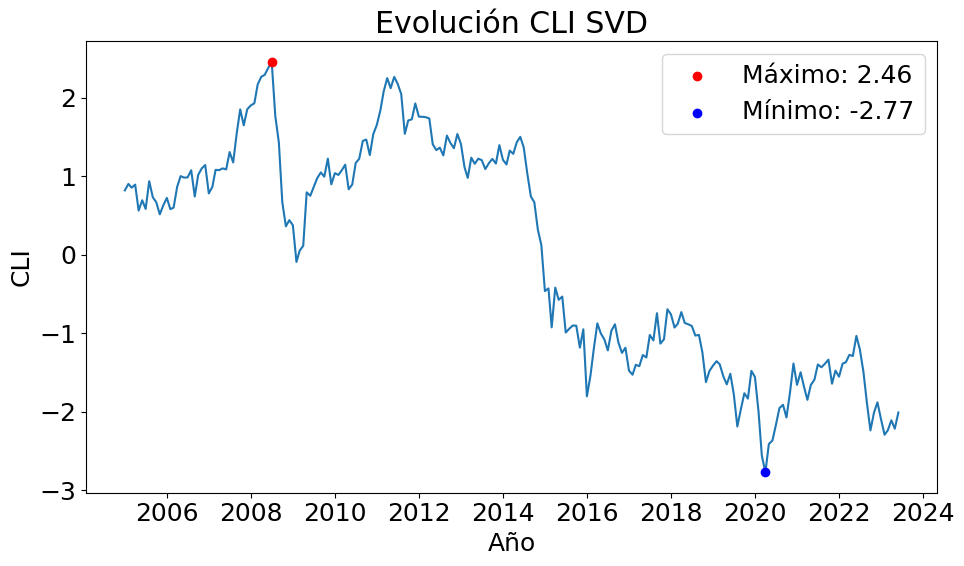

In [168]:
# Asegurarse de que el índice es de tipo datetime
CLI_svd.index = pd.to_datetime(CLI_svd.index)

# Crear la gráfica de línea
plt.figure(figsize=(10,6))
plt.plot(CLI_svd)

# Encuentra el valor máximo y mínimo en la serie CLI_svd
max_value = round(CLI_svd.max().values[0], 4)
min_value = round(CLI_svd.min().values[0], 4)

# Creamos el punto maximo y el punto minimo
plt.scatter(CLI_svd.idxmax(), max_value, color='red', label='Máximo: {:.2f}'.format(max_value), zorder=5)
plt.scatter(CLI_svd.idxmin(), min_value, color='blue', label='Mínimo: {:.2f}'.format(min_value), zorder=5)

plt.xlabel('Año')
plt.ylabel('CLI')
plt.title('Evolución CLI SVD')
plt.legend()
plt.tight_layout()
plt.show()

'''' pendiente descripciones '''''

# Información de Sesión

In [44]:
import session_info
session_info.show(html=False)

-----
matplotlib          3.5.3
numpy               1.26.0
pandas              1.4.4
pca                 2.0.5
seaborn             0.12.2
session_info        1.0.0
-----
IPython             8.10.0
jupyter_client      8.0.3
jupyter_core        5.2.0
notebook            6.5.2
-----
Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) [Clang 14.0.6 ]
macOS-14.0-arm64-arm-64bit
-----
Session information updated at 2023-09-26 21:51
